# Q&A Activity - Week 04

# 1. Compare churn count with respect to gender.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [41]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [44]:
df.isnull().sum().sum()

0

In [45]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

C:\Users\raseena.ppallintakat\AppData\Local\Temp\ipykernel_17632\4244994665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Churn"]=df2.Churn.replace("Yes",1)
C:\Users\raseena.ppallintakat\AppData\Local\Temp\ipykernel_17632\4244994665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Churn"]=df2.Churn.replace("No",0)


Text(0, 0.5, 'Churn Count')

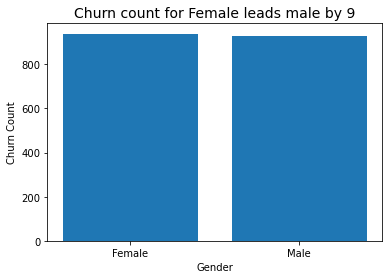

In [74]:
df2=df[["gender","Churn"]]
df2["Churn"]=df2.Churn.replace("Yes",1)
df2["Churn"]=df2.Churn.replace("No",0)
plt.bar(["Female","Male"],df2.groupby("gender")["Churn"].sum())
plt.title("Churn count for Female leads male by 9",fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Churn Count")

# 2. Find out how many female senior citizens there in the dataset

C:\Users\raseena.ppallintakat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Male & Female citizens')

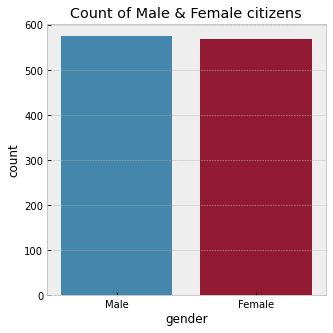

In [339]:
plt.figure(figsize=(5,5))
df4=df[["gender","SeniorCitizen"]]
df4=df4[df4["SeniorCitizen"]==1]
sns.countplot(df4["gender"])
plt.title("Count of Male & Female citizens")

# 3. Compare 'tenure' with 'Total Charges'

(0.0, 8000.0)

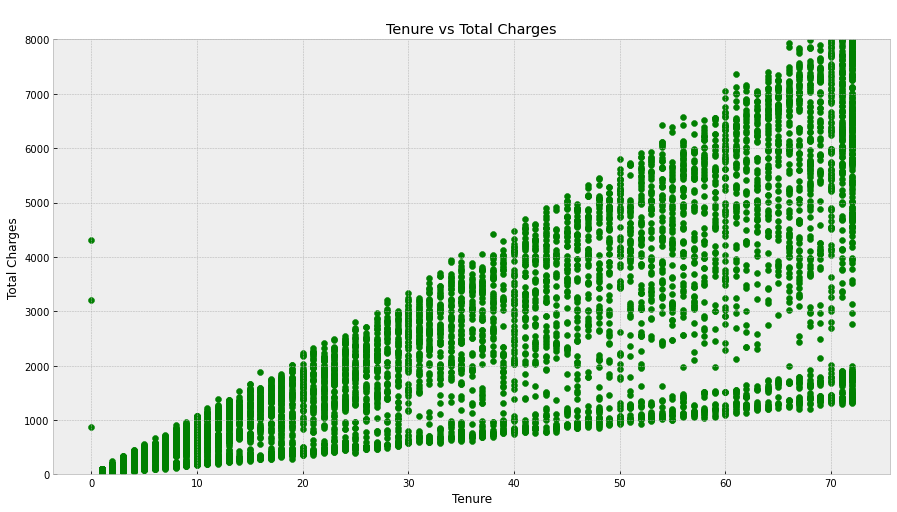

In [354]:
# Approach -1
plt.figure(figsize=(15,8))
plt.style.use('bmh')
plt.scatter(x="tenure",y="TotalCharges",data=df,c="green",vmin=0, vmax=100, cmap='rainbow')
plt.title("\nTenure vs Total Charges")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
plt.ylim(0, 8000)

Insight: In this scatter plot, small values of Tenure yield small scatter in Total Charges while large values of Tenure resut in
        larger scatter in Total Charges

Text(0.5, 1.0, 'Correlation between Tenure & TotalCharges\n')

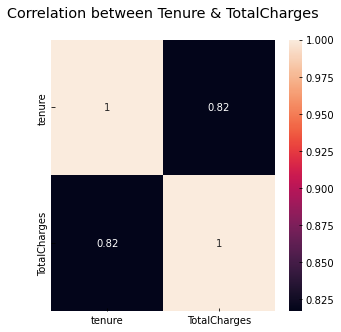

In [355]:
# Approach -2
plt.figure(figsize=(5,5))
sns.heatmap(df[["tenure","TotalCharges"]].corr(),annot=True)
plt.title("Correlation between Tenure & TotalCharges\n")

# 4. Find out which contract is preferred by the senior citizen.


C:\Users\raseena.ppallintakat\AppData\Local\Temp\ipykernel_17632\21328512.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df5=df[df["SeniorCitizen"]==1].dropna(False)
C:\Users\raseena.ppallintakat\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


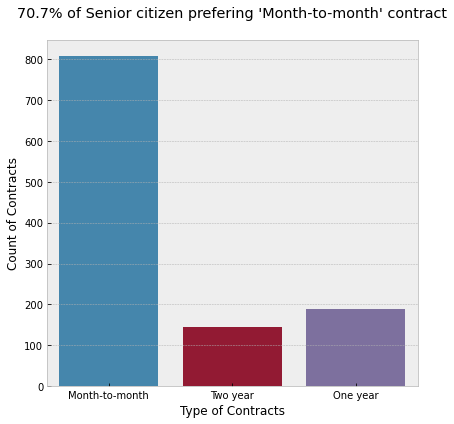

In [316]:
plt.figure(figsize=(6,6))
df5=df[df["SeniorCitizen"]==1].dropna(False)

sns.countplot(df5["Contract"])
plt.ylabel("Count of Contracts")
plt.xlabel("Type of Contracts")
r=(df5[df5["Contract"]=='Month-to-month'].value_counts().sum()/df5["Contract"].value_counts().sum())*100
plt.title("70.7% of Senior citizen prefering 'Month-to-month' contract\n ")
plt.tight_layout()

# 5. Comment on your finds on Payment Method?


Insight:
 
33.6% of total Customers is preferring Electronice check as payment method


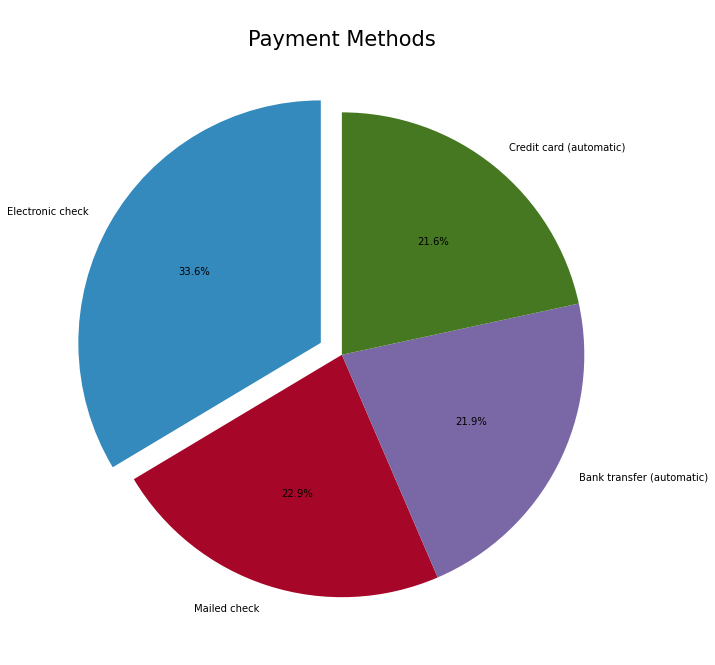

In [356]:
r=df["PaymentMethod"].value_counts()
list=r.index
ref=dict()

for i in list:
    k=df[df["PaymentMethod"]==i].value_counts().sum()
    ref[i]=k
ref

fig1, ax1 = plt.subplots()
fig1.figsize=(5,5)
ax1.pie(ref.values(),labels=list,explode = (0.1, 0.0, 0, 0),autopct='%1.1f%%',startangle=90)
plt.tight_layout()
plt.title("\nPayment Methods",size=21)


print("\nInsight:\n \n33.6% of total Customers is preferring Electronice check as payment method")